In [ ]:
# Import all necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime as dt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in the dataset
calendar_df = pd.read_csv('/content/drive/My Drive/listings_detailed.csv')

# Data Understanding

In [ ]:
# Data Understanding
calendar_df.shape

(6998, 75)

In [ ]:
calendar_df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24


# Data Preparation and Cleaning

# Basic Data Cleaning

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   listing_url                                   6998 non-null   object 
 2   scrape_id                                     6998 non-null   int64  
 3   last_scraped                                  6998 non-null   object 
 4   source                                        6998 non-null   object 
 5   name                                          6998 non-null   object 
 6   description                                   6992 non-null   object 
 7   neighborhood_overview                         4506 non-null   object 
 8   picture_url                                   6998 non-null   object 
 9   host_id                                       6998 non-null   i

In [ ]:
calendar_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.998000e+03,6.998000e+03,6.998000e+03,6998.000000,6998.000000,0.0,6998.000000,6998.000000,6998.000000,0.0,...,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6998.000000,6998.000000,6998.000000,6998.000000,6316.000000
mean,1.868001e+17,2.023031e+13,1.001616e+08,2.480280,4.438983,NaN,52.366767,4.890218,2.908260,NaN,...,4.759781,4.878554,4.890019,4.788021,4.640970,1.806516,1.023149,0.693055,0.039869,1.134069
std,3.138377e+17,0.000000e+00,1.356648e+08,12.798773,26.261102,NaN,0.017055,0.035085,1.387231,NaN,...,0.323061,0.233375,0.234914,0.252756,0.321297,2.474394,1.386672,1.939071,0.448247,2.396285
min,2.818000e+03,2.023031e+13,3.159000e+03,1.000000,1.000000,NaN,52.290340,4.755710,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.578534e+07,2.023031e+13,9.506638e+06,1.000000,1.000000,NaN,52.355979,4.866687,2.000000,NaN,...,4.670000,4.850000,4.870000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.270000
50%,3.534389e+07,2.023031e+13,3.403882e+07,1.000000,1.000000,NaN,52.366065,4.888160,2.000000,NaN,...,4.860000,4.950000,4.970000,4.860000,4.690000,1.000000,1.000000,0.000000,0.000000,0.530000
75%,5.821187e+17,2.023031e+13,1.354875e+08,2.000000,3.000000,NaN,52.376540,4.908185,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,1.000000,0.000000,1.170000
max,8.427546e+17,2.023031e+13,5.044487e+08,522.000000,699.000000,NaN,52.425120,5.026430,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,14.000000,20.000000,8.000000,111.590000


These columns have all the values missing ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']


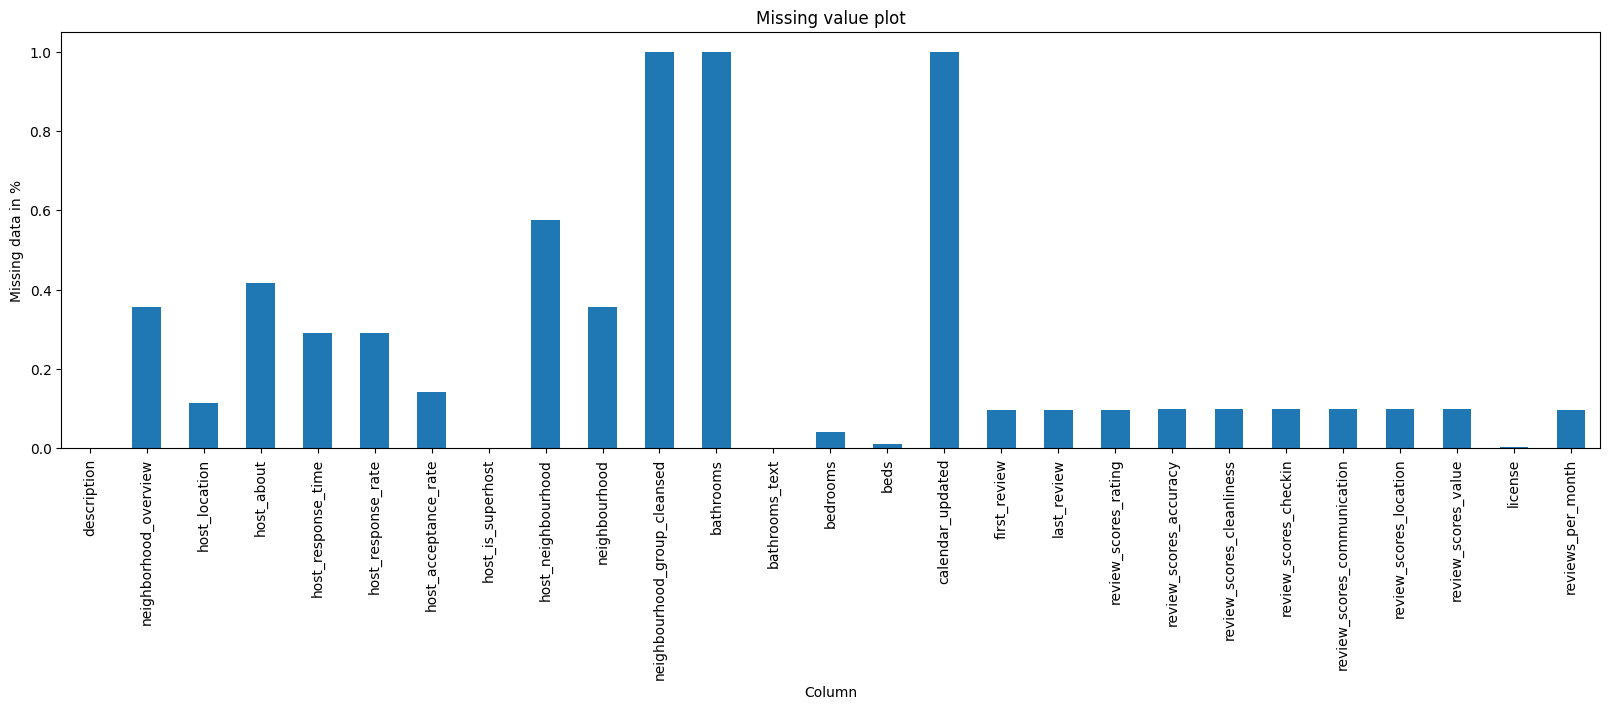

In [ ]:
def missing(data):
    if data.isna().sum().sum()==0:
        return "all missing values treated"
    data = data.isna().sum()/data.shape[0]
    data[data>0].plot(kind='bar', figsize=(16,7))
    all_miss = list(data[data==1].index)
    print("These columns have all the values missing",all_miss)
    plt.title("Missing value plot")
    plt.tight_layout()
    plt.xlabel("Column")
    plt.ylabel("Missing data in %")
    plt.xticks(rotation=90)
    plt.show()
     

missing(calendar_df)

In [ ]:
#columns with missing values
empty_columns = calendar_df.columns[calendar_df.isna().any()]
print(calendar_df[empty_columns].isna().sum())


description                        6
neighborhood_overview           2492
host_location                    803
host_about                      2915
host_response_time              2039
host_response_rate              2039
host_acceptance_rate             995
host_is_superhost                  4
host_neighbourhood              4022
neighbourhood                   2492
neighbourhood_group_cleansed    6998
bathrooms                       6998
bathrooms_text                    13
bedrooms                         284
beds                              85
calendar_updated                6998
first_review                     682
last_review                      682
review_scores_rating             682
review_scores_accuracy           686
review_scores_cleanliness        686
review_scores_checkin            686
review_scores_communication      686
review_scores_location           686
review_scores_value              686
license                           24
reviews_per_month                682
d

In [ ]:
#dropping empty columns
columns_to_drop = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']
calendar_df = calendar_df.drop(columns_to_drop, axis=1)


In [ ]:
#dropping empty enteries for reviews columns
calendar_df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],inplace=True)


In [ ]:
# combining all reviews columns to a single average column as all reflect similar behaviour
# average of the review and removing 0 reviews
calendar_df['reviews_average'] = (calendar_df.review_scores_rating + calendar_df.review_scores_accuracy + calendar_df.review_scores_cleanliness + calendar_df.review_scores_checkin + calendar_df.review_scores_communication + calendar_df.review_scores_location + calendar_df.review_scores_value ) / 7
calendar_df['reviews_average'].value_counts()
calendar_df = calendar_df[calendar_df['reviews_average']> 0]
calendar_df['reviews_average'].shape
     

(6312,)

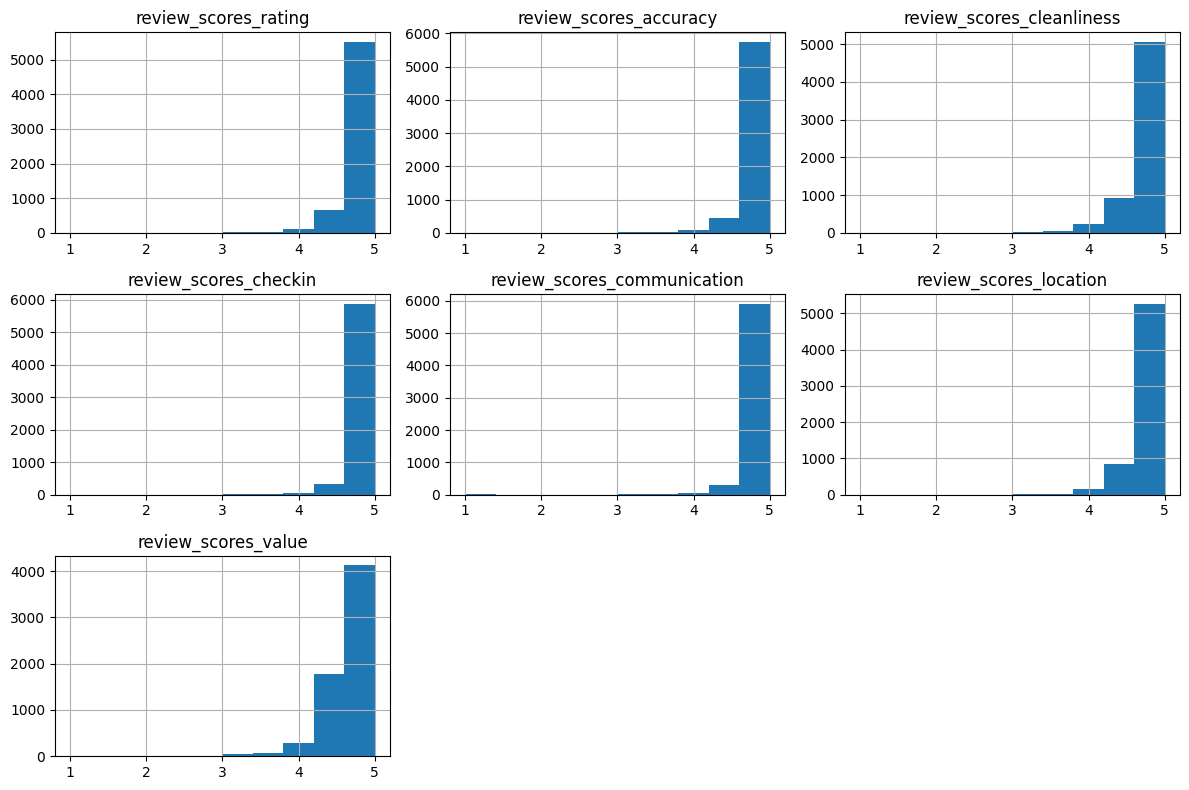

In [ ]:
vars = list(calendar_df.columns[calendar_df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(vars):
    ax = fig.add_subplot(3,3,i+1)
    calendar_df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
calendar_df.drop( ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication',
                    'review_scores_location','review_scores_value'],
                  axis=1,inplace=True)

In [ ]:
# Drop more non-contributing columns
calendar_df.drop( ['availability_30','availability_60','availability_90','host_response_time'],
                   axis=1, inplace=True)


In [ ]:
# Remove $ and convert price to float

calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df['price'].mean()

215.8222433460076

In [ ]:
# Removing % signs 

calendar_df['host_response_rate'] = calendar_df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
calendar_df['host_acceptance_rate'] = calendar_df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


In [ ]:
# Converting object colummn to categorical datat type
calendar_df['host_is_superhost'] = pd.Categorical(calendar_df['host_is_superhost'], categories=['False', 'True'], ordered=False)
# Replace missing values with "False"
calendar_df['host_is_superhost'] = calendar_df['host_is_superhost'].fillna('False')

In [ ]:
# Extracting numerical data from bathrooms_text
calendar_df['bathrooms_text'] = calendar_df['bathrooms_text'].str.extract('(\d+\.?\d*)')
calendar_df['bathrooms_text'] = calendar_df['bathrooms_text'].astype(float)
calendar_df['bathrooms_text'] = calendar_df['bathrooms_text'].fillna(0)

In [ ]:
#Dropping rows with missing enteries for low variance features
calendar_df.dropna(subset=['description','license',],inplace=True)

In [ ]:
# Dealing with missing values in beds and bedrooms columns
calendar_df['beds'] = calendar_df['beds'].fillna(0)
calendar_df['bedrooms'] = calendar_df['bedrooms'].fillna(0)

In [ ]:
# drop rows with price <= 0, bedrooms <=0, accommodates <= 0

calendar_df = calendar_df[calendar_df.price > 0]
calendar_df = calendar_df[calendar_df.bedrooms > 0]
calendar_df = calendar_df[calendar_df.accommodates > 0]

In [ ]:
# Replacing missing values in neighbourhood column with a default value
calendar_df['neighbourhood'] = calendar_df['neighbourhood'].fillna('Amsterdam, Netherlands')

In [ ]:
calendar_df.shape

(6033, 62)

# Converting categorical data to numerical values

In [ ]:
duplicates = calendar_df[calendar_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, license, instant_bookable, calculated_host_listings_count, calculated_host_listings_count

In [ ]:
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['host_is_superhost'] = le.fit_transform(calendar_df['host_is_superhost'])
calendar_df['host_is_superhost'] = calendar_df['host_is_superhost'].astype(bool).astype(int)

calendar_df['host_identity_verified'] = le.fit_transform(calendar_df['host_identity_verified'])
calendar_df['host_identity_verified'] = calendar_df['host_identity_verified'].astype(bool).astype(int)

calendar_df['host_has_profile_pic'] = le.fit_transform(calendar_df['host_has_profile_pic'])
calendar_df['host_has_profile_pic'] = calendar_df['host_has_profile_pic'].astype(bool).astype(int)

calendar_df['instant_bookable'] = le.fit_transform(calendar_df['instant_bookable'])
calendar_df['instant_bookable'] = calendar_df['instant_bookable'].astype(bool).astype(int)

calendar_df['has_availability'] = le.fit_transform(calendar_df['has_availability'])
calendar_df['has_availability'] = calendar_df['has_availability'].astype(bool).astype(int)



In [ ]:
calendar_df['room_type'] = calendar_df['room_type'].astype(str)
le.fit(calendar_df['room_type'].unique())
calendar_df['room_type'] = le.transform(calendar_df['room_type'])

In [ ]:
calendar_df['property_type'] = calendar_df['property_type'].astype(str)
le.fit(calendar_df['property_type'].unique())
calendar_df['property_type'] = le.transform(calendar_df['property_type'])

In [ ]:
encoded_df = pd.get_dummies(calendar_df['neighbourhood_cleansed'], prefix='neighbourhood')
calendar_df = pd.concat([calendar_df, encoded_df], axis=1)

In [ ]:
verification_df = calendar_df['host_verifications'].str.strip("[]").str.replace("'", "").str.get_dummies(', ')

# Concatenate the encoded verification columns with the original DataFrame
calendar_df = pd.concat([calendar_df, verification_df], axis=1)

# Drop the original host_verifications column
calendar_df.drop('host_verifications', axis=1, inplace=True)

In [ ]:
#create a list containing all amenities from each host
amenities = list(calendar_df['amenities'])
#merge all amenities from hosts into one single list
am = ','.join(amenities)
#remove the left and right brackets
am = am.replace('[','')
am = am.replace(']','')
#split each element with a comma
am = am.split(',')
#Turn the list of amenities into a set
amenity_items = list(set(am))
amenity_items = list(filter(None, amenity_items))

#Remove quotations of each item
for i in range(len(amenity_items)):
    amenity_items[i] = re.sub(r'^"|"$', '', amenity_items[i])

#Remove wrong data values called "Translation missing"  
for item in amenity_items:
    match = re.match(r'translation',item)
    if match:
        amenity_items.remove(item)
for i in range(len(amenities)):
    amenities[i] = amenities[i].replace('[','')
    amenities[i] = amenities[i].replace(']','')
    amenities[i] = amenities[i].split(',')
    for j in range(len(amenities[i])):
        amenities[i][j] = re.sub(r'^"|"$', '', amenities[i][j])


In [ ]:
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('internet|pocket wifi|wifi|ethernet connection'), 'internet'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('24-hour check-in'), 'check_in_24h'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('air conditioning|central|heating|ceiling fans|central air conditioning|ac|heating|fans'), 'climate_control'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('amazon prime video|hbo max|chromecast|disney +|amazon echo|apple tv|game console|netflix|projector and screen|smart tv|tv|hdtv'), 'high_end_electronics'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('cable|sound system|speaker|record player|roku|board games|books and reading material|dvd player'), 'entertainment'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('pool table|pingpong|piano|backyard'), 'recreation'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('bbq grill|barbecue utensils|fire pit|propane barbeque|bbq'), 'bbq'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('balcony|patio'), 'balcony'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('beach view|beachfront|lake access|mountain view|ski-in/ski-out|waterfront|access'), 'nature_and_views'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('breakfast'), 'breakfast'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('changing table|high chair|crib|baby bath|baby monitor|baby safety gates'), 'baby_equipment'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('iron|closet|clothing storage'), 'clothing_care_and_storage'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('coffee maker|espresso machine|coffee|french press'), 'coffee_machine'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('cooking basics|stove|blender|oven|toaster|rice maker|microwave|kitchen|dishware|silverware'), 'kitchen_appliances'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('safe|carbon monoxide alarm|smoke alarm|security system|security cameras| room-darkening shades|window guards|guards|fire extinguisher'), 'security'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('soap|conditioner|shower gel|body wash|shampoo|body gel|toiletries|slippers'), 'personal_care_items'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('dishwasher|dryer|washer|laundry|drying rack'), 'white_goods'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('elevator'), 'elevator'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('exercise equipment|gym|fitness center'), 'gym'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('bathrobes|hair dryer|soap|conditioner|shower gel|body wash|shampoo|body gel|toiletries|slippers'), 'personal_care_items'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('family/kid friendly|children'), 'child_friendly'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('self-parking|parking|valet parking|garage|carport'), 'parking'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('garden|outdoor|sun loungers|terrace'), 'outdoor_space'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('host greets you'), 'host_greeting'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('hot tub|jetted tub|sauna|pool'), 'hot_tub_sauna_or_pool'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('long term stays allowed'), 'long_term_stays'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('pets|pet|cat(s)|dog(s)'), 'pets_allowed'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('private entrance|private'), 'private_entrance'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('self check-in'), 'self_check_in'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('smoking allowed'), 'smoking_allowed'] = 1

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = calendar_df.iloc[:,41:].columns
calendar_df[cols_to_replace_nulls] = calendar_df[cols_to_replace_nulls].fillna(0)
calendar_df.drop('amenities', axis=1, inplace=True)

In [ ]:
uint8_columns = calendar_df.select_dtypes(include='uint8').columns

# Convert columns to int
calendar_df[uint8_columns] = calendar_df[uint8_columns].astype(int)

In [ ]:
# Convert to date time
date_columns = ['calendar_last_scraped', 'first_review', 'last_review', 'host_since', 'last_scraped']
calendar_df[date_columns] = calendar_df[date_columns].apply(pd.to_datetime)

# Model training 

In [ ]:
num_rows = calendar_df.shape[0]
print(f'The DataFrame has {num_rows} rows.')

# get the number of columns
num_cols = calendar_df.shape[1]
print(f'The DataFrame has {num_cols} columns.')

The DataFrame has 6033 rows.
The DataFrame has 109 columns.


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6033 entries, 0 to 6949
Columns: 109 entries, id to private_entrance
dtypes: datetime64[ns](5), float64(35), int64(53), object(16)
memory usage: 5.1+ MB


In [ ]:
empty_columns = calendar_df.columns[calendar_df.isna().any()]
print(calendar_df[empty_columns].isna().sum())

neighborhood_overview    2012
host_location             636
host_about               2407
host_response_rate       1767
host_acceptance_rate      786
host_neighbourhood       3260
dtype: int64


In [ ]:
# Select columns of object type
object_cols = calendar_df.select_dtypes(include='object').columns

# Drop columns of object type
calendar_df = calendar_df.drop(object_cols, axis=1)

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6033 entries, 0 to 6949
Data columns (total 93 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   id                                                    6033 non-null   int64         
 1   scrape_id                                             6033 non-null   int64         
 2   last_scraped                                          6033 non-null   datetime64[ns]
 3   host_id                                               6033 non-null   int64         
 4   host_since                                            6033 non-null   datetime64[ns]
 5   host_response_rate                                    4266 non-null   float64       
 6   host_acceptance_rate                                  5247 non-null   float64       
 7   host_is_superhost                                     6033 non-null   int64   

In [ ]:
# Extract relevant features from the datetime column
calendar_df['last_scraped_year'] = pd.to_datetime(calendar_df['last_scraped']).dt.year.astype('float64')
calendar_df['last_scraped_month'] = pd.to_datetime(calendar_df['last_scraped']).dt.month.astype('float64')
calendar_df['last_scraped_day'] = pd.to_datetime(calendar_df['last_scraped']).dt.day.astype('float64')

# Drop the original datetime column
calendar_df.drop('last_scraped', axis=1, inplace=True)

In [ ]:
# Extract relevant features from the datetime column
calendar_df['host_since_year'] = pd.to_datetime(calendar_df['host_since']).dt.year.astype('float64')
calendar_df['host_since_month'] = pd.to_datetime(calendar_df['host_since']).dt.month.astype('float64')
calendar_df['host_since_day'] = pd.to_datetime(calendar_df['host_since']).dt.day.astype('float64')

# Drop the original datetime column
calendar_df.drop('host_since', axis=1, inplace=True)

In [ ]:
# Extract relevant features from the datetime column
calendar_df['first_review_year'] = pd.to_datetime(calendar_df['first_review']).dt.year.astype('float64')
calendar_df['first_review_month'] = pd.to_datetime(calendar_df['first_review']).dt.month.astype('float64')
calendar_df['first_review_day'] = pd.to_datetime(calendar_df['first_review']).dt.day.astype('float64')

# Drop the original datetime column
calendar_df.drop('first_review', axis=1, inplace=True)

In [ ]:
# Extract relevant features from the datetime column
calendar_df['last_review_year'] = pd.to_datetime(calendar_df['last_review']).dt.year.astype('float64')
calendar_df['last_review_month'] = pd.to_datetime(calendar_df['last_review']).dt.month.astype('float64')
calendar_df['last_review_day'] = pd.to_datetime(calendar_df['last_review']).dt.day.astype('float64')

# Drop the original datetime column
calendar_df.drop('last_review', axis=1, inplace=True)

In [ ]:
# Extract relevant features from the datetime column
calendar_df['calendar_last_scraped_year'] = pd.to_datetime(calendar_df['calendar_last_scraped']).dt.year.astype('float64')
calendar_df['calendar_last_scraped_month'] = pd.to_datetime(calendar_df['calendar_last_scraped']).dt.month.astype('float64')
calendar_df['calendar_last_scraped_day'] = pd.to_datetime(calendar_df['calendar_last_scraped']).dt.day.astype('float64')

# Drop the original datetime column
calendar_df.drop('calendar_last_scraped', axis=1, inplace=True)

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6033 entries, 0 to 6949
Columns: 103 entries, id to calendar_last_scraped_day
dtypes: float64(50), int64(53)
memory usage: 4.8 MB


In [ ]:
X = calendar_df.drop('price', axis=1)
y = calendar_df['price']
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6033 entries, 0 to 6949
Columns: 102 entries, id to calendar_last_scraped_day
dtypes: float64(49), int64(53)
memory usage: 4.7 MB


In [ ]:
# dealing with missing values in x
from scipy import sparse
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
print(X_imputed.shape)


(6033, 102)


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_imputed)
X_scaled

array([[-0.53395787,  0.        , -0.72011972, ...,  0.        ,
         0.        , -1.59846715],
       [-0.53395787,  0.        , -0.70780421, ...,  0.        ,
         0.        ,  0.62559934],
       [-0.53395787,  0.        , -0.70749038, ...,  0.        ,
         0.        ,  0.62559934],
       ...,
       [ 2.36567252,  0.        , -0.18562486, ...,  0.        ,
         0.        ,  0.62559934],
       [ 2.37321598,  0.        ,  1.16568841, ...,  0.        ,
         0.        , -1.59846715],
       [ 2.37845591,  0.        ,  1.88866116, ...,  0.        ,
         0.        , -1.59846715]])

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression


# Initialize the linear regression model
lr = LinearRegression()

# Initialize the forward feature selector
sfs = SequentialFeatureSelector(lr, n_features_to_select=50, direction='forward')

# Train the forward feature selector on your data
sfs.fit(X_imputed, y)

# Print the selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features: ", selected_features)


Selected Features:  Index(['scrape_id', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'latitude', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'maximum_minimum_nights',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count_entire_homes', 'reviews_average',
       'neighbourhood_Bijlmer-Centrum', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbuurt',
       'neighbourhood_Gaasperdam - Driemond',
       'neighbourhood_Geuzenveld - Slotermeer',
       'neighbourhood_IJburg - Zeeburgereiland', 'neighbourhood_Noord-Oost',
       'neighbourhood_Noord-West',
       'neighbourhood_Oostelijk Havengebied - Indische Buurt',
       'neighbourhood_Osdorp', 'neighbourhood_Oud-Oost',
       'neighbourhood_Westerpark', 'neighbourhood_Zuid', 'email', 'phone',
       'photographer', 'high_e

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = lr.predict(X_test)

In [ ]:
#evaluating model on training set
y_pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE on the training set:', mse_train)

MSE on the training set: 21741.47011485595


In [ ]:
#evaluating model on testing set
y_pred_test = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the testing set:', mse_test)

MSE on the testing set: 8339.642104188952


In [ ]:
# accuracy the model
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

Train R^2 score: 0.33137303078909697
Test R^2 score: 0.4510808371933067


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Load the Boston Housing dataset as an example


# Initialize the linear regression model
lr = LinearRegression()

# Initialize the backward feature selector
sfs = SequentialFeatureSelector(lr, n_features_to_select=30, direction='backward')

# Train the backward feature selector on your data
sfs.fit(X_imputed, y)
# Print the selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features: ", selected_features)




Selected Features:  Index(['id', 'host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'property_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'entertainment', 'recreation', 'baby_equipment', 'child_friendly',
       'private_entrance', 'last_scraped_day', 'first_review_year',
       'last_review_month', 'calendar_last_scraped_day'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_imputed[:, sfs.get_support()], y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train1, y_train)


LinearRegression()

In [ ]:
# accuracy the model
train_score = lr.score(X_train1, y_train1)
test_score = lr.score(X_test1, y_test1)

print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

Train R^2 score: 0.05708499409232082
Test R^2 score: 0.08067337291300902
